# Projeto 1 "Online Retail"

Dataset disponibilizado pela UC Irvine Macbine Leaning Repository em https://archive.ics.uci.edu/dataset/352/online+retail

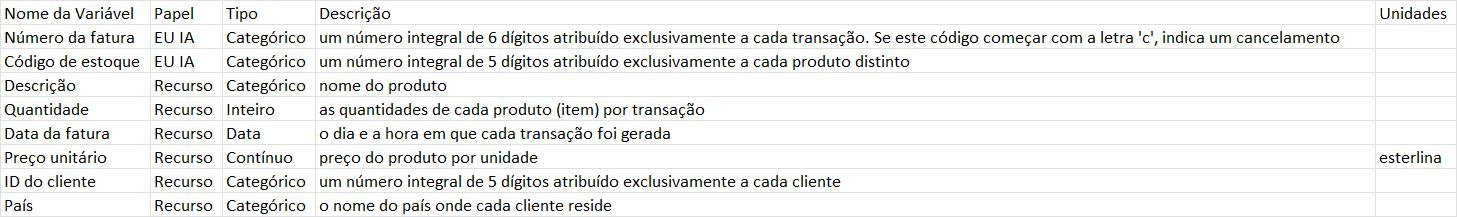

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import time

In [2]:
#Importação de dados
start_1 = time.time()
df = pd.read_excel('Online+Retail.xlsx')
end_1 = time.time()
print("A execução 1 demorou: ", end_1 - start_1)   

A execução 1 demorou:  97.52111911773682


In [3]:
#Convertendo Coluna 'CustomerID' para objetc. 
df['CustomerID'] = df['CustomerID'].astype('object')
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

In [4]:
def remov_out(df): 
    df_copy = df.copy()
    lista_col = df_copy.select_dtypes(include=['float64', 'int64']).columns
    
    for col in lista_col:
        Q1 = df_copy[col].quantile(0.25)
        Q3 = df_copy[col].quantile(0.75)
        
        # Calculando o IQR (InterQuartile Range)
        IQR = Q3 - Q1

        # Definindo os limites para identificar outliers
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Filtrando com base nos limites
        df_copy = df_copy[(df_copy[col] >= limite_inferior) & (df_copy[col] <= limite_superior)]
        
        # Exibindo as informações de quantis para cada coluna
        print(f'| Coluna: {col} | Quantile 25%: {Q1} | Quantile 75%: {Q3}')
    
    return df_copy

df = remov_out(df)
remov_out(df)
print(df2.min())


| Coluna: Quantity | Quantile 25%: 1.0 | Quantile 75%: 10.0
| Coluna: UnitPrice | Quantile 25%: 1.25 | Quantile 75%: 4.15
| Coluna: Quantity | Quantile 25%: 1.0 | Quantile 75%: 7.0
| Coluna: UnitPrice | Quantile 25%: 1.25 | Quantile 75%: 3.95


NameError: name 'df2' is not defined

In [6]:
#Criação do SalesTotal
df['SalesTotals'] = round(df['Quantity']*df['UnitPrice'],1)

In [7]:
df = df.copy()

# Criando a coluna 'MonthYear' corretamente no formato YYYY-MM
df['MonthYear'] = df['InvoiceDate'].dt.strftime('%Y-%m')

# Mantendo 'Year' como número inteiro
df['Year'] = df['InvoiceDate'].dt.year

# Mantendo 'Month' como número inteiro
df['Month'] = df['InvoiceDate'].dt.month

# Visualizando os tipos de dados para conferir
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
SalesTotals           float64
MonthYear              object
Year                    int64
Month                   int64
dtype: object

In [8]:
#Vizualização data frame
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SalesTotals,MonthYear,Year,Month
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.2,2011-12,2011,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.6,2011-12,2011,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.6,2011-12,2011,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.6,2011-12,2011,12
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.8,2011-12,2011,12


In [9]:
#DataSet Filtrando 'c' Cancelados
df_cancelados = df[df['InvoiceNo'].str.startswith('C', na=False)]
print('Total de Cancelamentos: ',len(df_cancelados))

#DataSet Filtrado Cancelados
df = df[~df['InvoiceNo'].isin(df_cancelados['InvoiceNo'])]
print('Total de Vendas Sem cancelamentos: ',len(df))
print('Percentual de Cancelamento: ', round(len(df_cancelados)/len(df),2),'%')

Total de Cancelamentos:  8207
Total de Vendas Sem cancelamentos:  475083
Percentual de Cancelamento:  0.02 %


In [10]:
#Percentual de NA's
((len(df) / df.count())-1).round(3)

InvoiceNo      0.000
StockCode      0.000
Description    0.002
Quantity       0.000
InvoiceDate    0.000
UnitPrice      0.000
CustomerID     0.383
Country        0.000
SalesTotals    0.000
MonthYear      0.000
Year           0.000
Month          0.000
dtype: float64

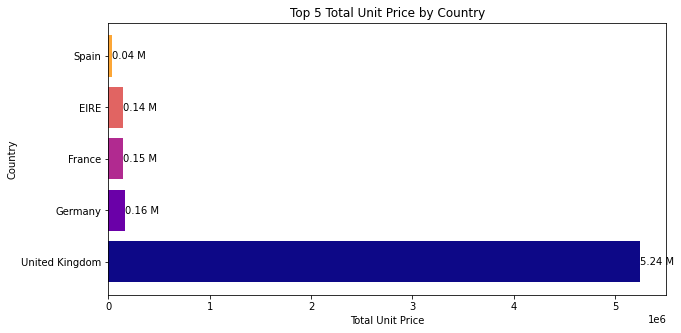

In [11]:
plt.figure(figsize=(10, 5))
for i, (country, value) in enumerate(df.groupby('Country')['SalesTotals'].sum().nlargest(5).items()):
    plt.barh(country, value, color=plt.cm.plasma(i / 5))
    plt.text(value, i, f'{value /1e6:.2f} M', va='center')  # Adicionar rótulo

# Config
plt.xlabel('Total Unit Price')
plt.ylabel('Country')
plt.title('Top 5 Total Unit Price by Country')


plt.show()


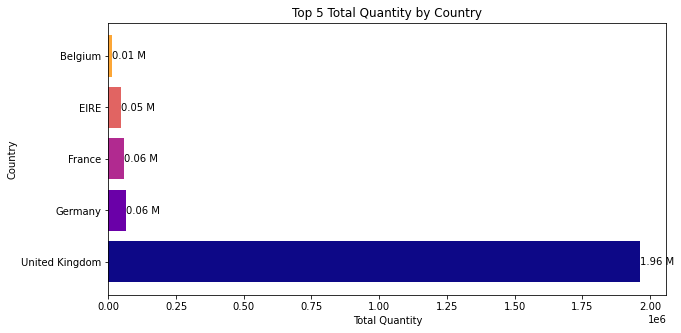

In [12]:
plt.figure(figsize=(10, 5))
for i, (country, value) in enumerate(df.groupby('Country')['Quantity'].sum().nlargest(5).items()):
    plt.barh(country, value, color=plt.cm.plasma(i / 5))
    plt.text(value, i, f'{value /1e6:.2f} M', va='center')  # Adicionar rótulo
    
# Config
plt.xlabel('Total Quantity')
plt.ylabel('Country')
plt.title('Top 5 Total Quantity by Country')


plt.show()

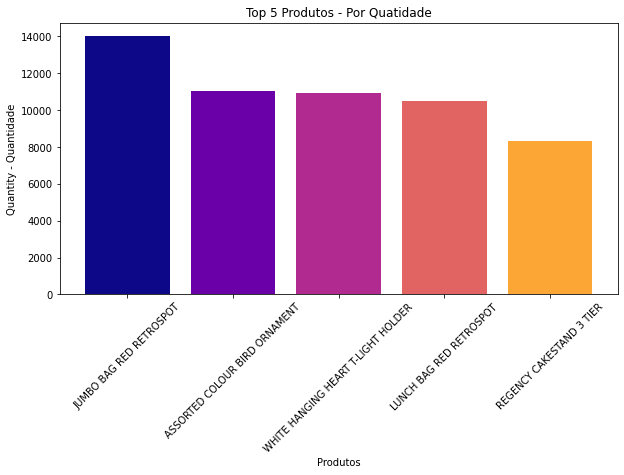

In [13]:
#Top 5 Produtos
plt.figure(figsize=(10, 5))
plt.bar(
    df.groupby('Description')['Quantity'].sum().nlargest(5).index,
    df.groupby('Description')['Quantity'].sum().nlargest(5).values,
    color=[plt.cm.plasma(i / 5) for i in range(5)],
    
   
)
# Config
plt.ylabel('Quantity - Quantidade')
plt.title('Top 5 Produtos - Por Quatidade')
plt.xlabel('Produtos')
plt.xticks(rotation=45)

plt.show()

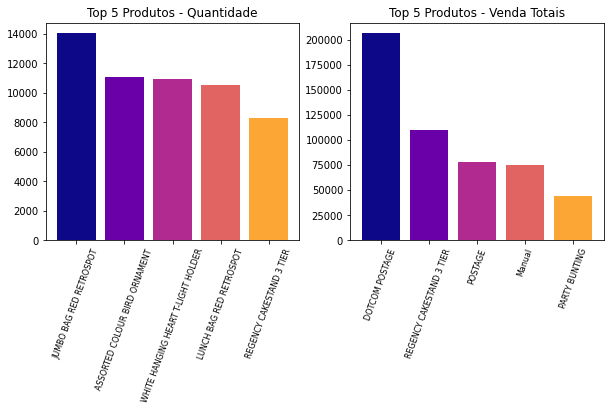

In [14]:
#Top 5 Produtos - Quantidades e Vendas
top_proucts_quantity = df.groupby('Description')['Quantity'].sum().nlargest(5)
label_quantity =  top_proucts_quantity.index
values_quantity = top_proucts_quantity.values

top_proucts_SalesTotals = df.groupby('Description')['SalesTotals'].sum().nlargest(5)
label_SalesTotals =  top_proucts_SalesTotals.index
values_SalesTotals = top_proucts_SalesTotals.values


fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10, 4))

#### Grafico 1
ax1.bar(label_quantity, values_quantity, color=[plt.cm.plasma(i / 5) for i in range(5)])

# Define as localizações e rótulos dos ticks
ax1.set_title('Top 5 Produtos - Quantidade')
ax1.set_xticks(range(len(label_quantity)))
ax1.set_xticklabels(label_quantity, rotation=70, fontsize=8); 

#### Grafico 2
ax2.bar(label_SalesTotals, values_SalesTotals, color=[plt.cm.plasma(i / 5) for i in range(5)])

# Define as localizações e rótulos dos ticks
ax2.set_title('Top 5 Produtos - Venda Totais')
ax2.set_xticks(range(len(label_SalesTotals))) 
ax2.set_xticklabels(label_SalesTotals, rotation=70,fontsize=8);

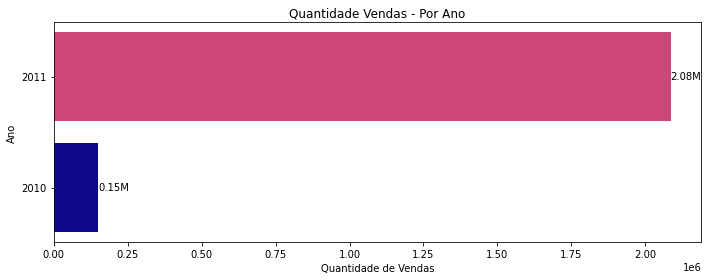

In [15]:
# Agrupar e somar as quantidades por ano
quantity_year = df.groupby('Year')['Quantity'].sum()

# Obter os rótulos e valores
label_quantity_year = quantity_year.index.tolist()  # Converte o índice para uma lista
values_quantity_year = quantity_year.values

# Criar a figura e o eixo
fig, ax3 = plt.subplots(1, 1, figsize=(10, 4))

# Gráfico de barras horizontais
bars = ax3.barh(label_quantity_year, values_quantity_year, color=[plt.cm.plasma(i / 2) for i in range(len(label_quantity_year))])

# Adicionar rótulos de valores nas barras
for bar in bars:
    xval = bar.get_width()  # Comprimento da barra (quantidade)
    label = xval / 1_000_000
    ax3.text(xval, bar.get_y() + bar.get_height()/2, f'{label:.2f}M', va='center')  # Adiciona duas casas decimais

# Definir título e rótulos dos eixos
ax3.set_title('Quantidade Vendas - Por Ano')
ax3.set_xlabel('Quantidade de Vendas')
ax3.set_ylabel('Ano')

# Definir os ticks do eixo Y para mostrar apenas os anos desejados
ax3.set_yticks([2010, 2011])  # Apenas 2010 e 2011
ax3.set_yticklabels([str(year) for year in label_quantity_year], fontsize=10)  # Rotular os anos

plt.tight_layout()
plt.savefig('nome_do_arquivo.png')
plt.show()


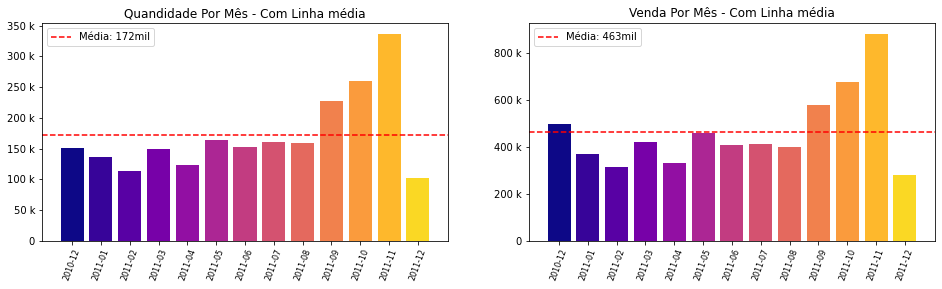

In [16]:
##### Grafico 5

quantity_month = df.groupby(['MonthYear'])['Quantity'].sum()

quantity_month_label = quantity_month.index
quantity_month_values = quantity_month.values

fig, (ax5,ax6) = plt.subplots(1,2,figsize=(16,4))

#Formatação da Barra
ax5.bar(quantity_month_label, quantity_month_values,
    color=[plt.cm.plasma(i /len(quantity_month_label)) for i in range(len(quantity_month_label))],
       width=0.8)

ax5.tick_params(axis='x', rotation=70, labelsize=8) #Formatação Com tick_Params

ax5.axhline(quantity_month_values.mean(), 
            color='red', 
            linestyle='--', 
            label=f'Média: {(quantity_month_values.mean()) /1000:.0f}mil')  #Linha Media axhline

ax5.yaxis.set_major_formatter(mtick.EngFormatter()) # Ajuste ticker Y

ax5.legend() #Legeda da Linha media


ax5.tick_params(axis='x', rotation=70, labelsize=8) #Rotação do Stick(Label)

ax5.set_title("Quandidade Por Mês - Com Linha média") #titulo

###### Grafico 6

sales_month = df.groupby(['MonthYear'])['SalesTotals'].sum()

sales_month_label = sales_month.index
sales_month_values = sales_month.values

#Formatação da Barra
ax6.bar(sales_month_label, sales_month_values,
    color=[plt.cm.plasma(i /len(sales_month_values)) for i in range(len(sales_month_values))],
       width=0.8)

ax6.tick_params(axis='x', rotation=70, labelsize=8) #Formatação Com tick_Params



ax6.axhline(sales_month_values.mean(), 
            color='red', 
            linestyle='--', 
            label=f'Média: {(sales_month_values.mean()) /1000:.0f}mil')  #Linha Media axhline

ax6.yaxis.set_major_formatter(mtick.EngFormatter()) # Ajuste ticker Y


ax6.legend() #Legeda da Linha media


ax6.tick_params(axis='x', rotation=70, labelsize=8) #Rotação do Stick(Label)

ax6.set_title("Venda Por Mês - Com Linha média") #titulo

plt.show()

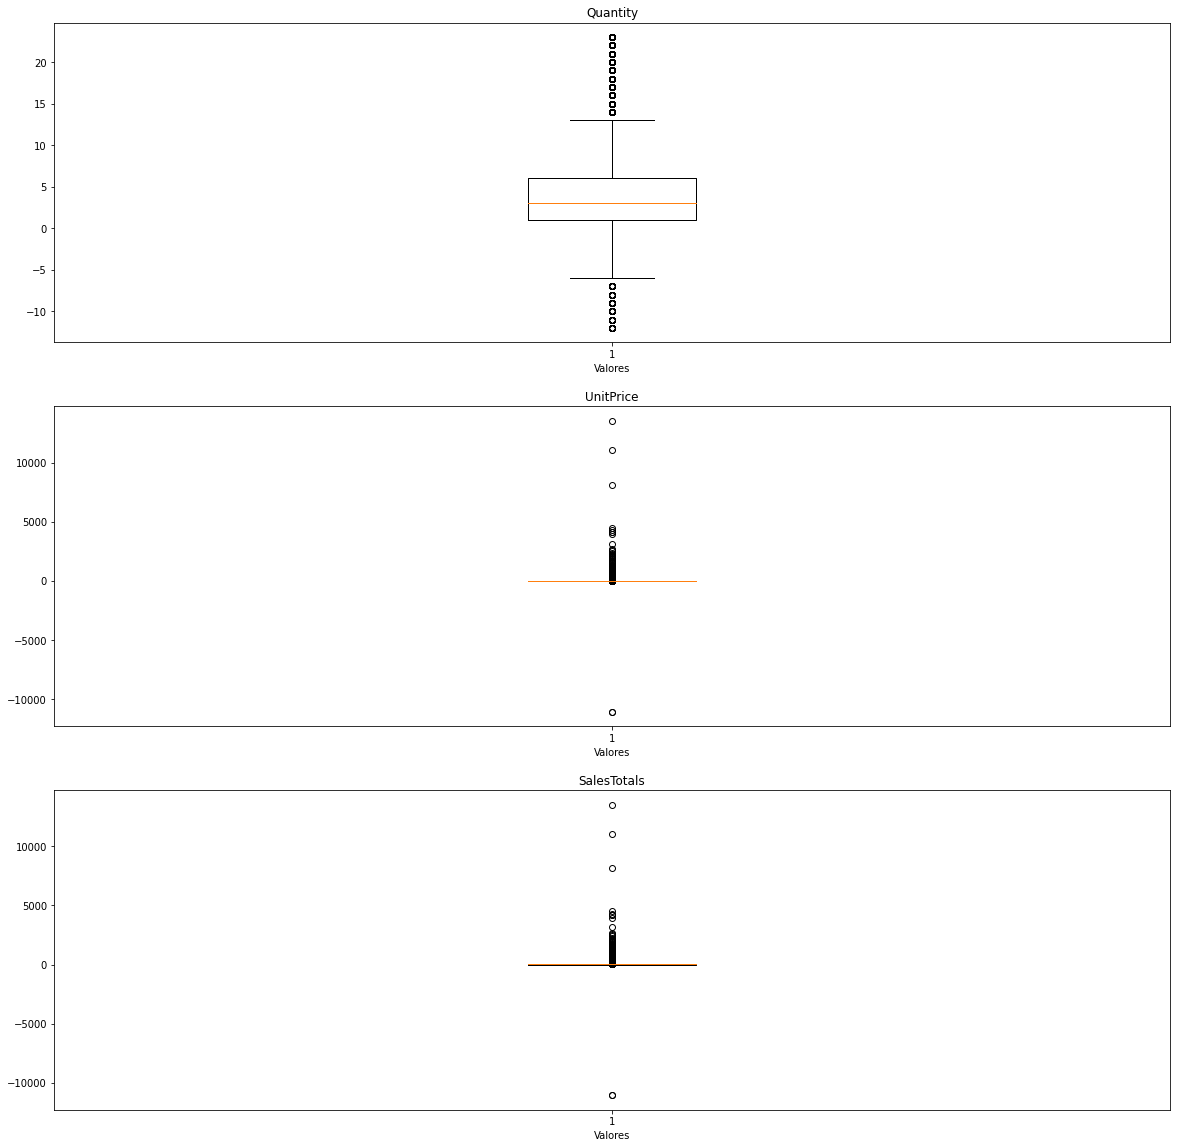

In [17]:
#BOX PLOT

colunas_numericas = df[['Quantity','UnitPrice','SalesTotals']].columns


plt.figure(figsize=(20,20))

for i,column  in enumerate(colunas_numericas):
    plt.subplot(len(colunas_numericas),1,i+1)
    plt.boxplot(df[column])
    plt.title(column)
    plt.xlabel('Valores')

#plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()  # Mostra os gráficos
    

In [18]:
corr_matrix = df[['Quantity','UnitPrice','SalesTotals']].corr()

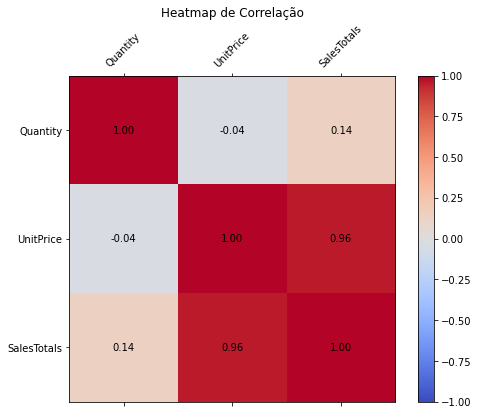

In [19]:
fig, ax7 = plt.subplots(figsize=(8,6))

coax = ax7.matshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)

fig.colorbar(coax)

# Definindo os rótulos dos eixos
ax7.set_xticks(np.arange(len(corr_matrix.columns)))
ax7.set_yticks(np.arange(len(corr_matrix.columns)))
ax7.set_xticklabels(corr_matrix.columns)
ax7.set_yticklabels(corr_matrix.columns)

plt.xticks(rotation=45)

# Adicionando os valores numéricos dentro das células
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        ax7.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')
        

        # Definindo o título do gráfico
plt.title('Heatmap de Correlação')

# Exibindo o gráfico
plt.show()


In [20]:
df.sort_values(by='UnitPrice', ascending=True).head(4000)
df.describe()

,Quantity,UnitPrice,SalesTotals,Year,Month
count,475083.000000,475083.000000,475083.000000,475083.000000,475083.000000
mean,4.706729,4.157976,12.678895,2010.920062,7.566926
std,4.451396,44.191490,46.380078,0.271197,3.523055
min,-12.000000,-11062.060000,-11062.100000,2010.000000,1.000000
25%,1.000000,1.250000,3.300000,2011.000000,5.000000
50%,3.000000,2.250000,8.300000,2011.000000,8.000000
75%,6.000000,4.150000,16.500000,2011.000000,11.000000
max,23.000000,13541.330000,13541.300000,2011.000000,12.000000
